<a href="https://colab.research.google.com/github/juliasalto/proyectoml/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import statsmodels.api as sm
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from google.colab import files
from google.colab import auth
from google.cloud import bigquery

In [ ]:
df = pd.read_csv("/content/rh_data - rh_data (2).csv")

In [ ]:
df.head()

,Age,AgeCategory,Attrition,BusinessTravel,Department,DistanceFromHome,DistanceCategory,Education,EducationCategory,EducationField,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,CategoryYearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,D,No,Travel_Rarely,Sales,6,Mid-Short Distance,2,Graduated,Life Sciences,...,Y,11,8,0,1.0,6,1,A,0,0
1,31,B,Yes,Travel_Frequently,Research and Development,10,Mid-Long Distance,1,Undergraduated,Life Sciences,...,Y,23,8,1,6.0,3,5,B,1,4
2,32,B,No,Travel_Frequently,Research and Development,17,Long Distance,4,Mastery,Other,...,Y,15,8,3,5.0,2,5,B,0,3
3,38,C,No,Non-Travel,Research and Development,2,Short Distance,5,Doctorate,Life Sciences,...,Y,11,8,3,13.0,5,8,C,7,5
4,32,B,No,Travel_Rarely,Research and Development,10,Mid-Long Distance,1,Undergraduated,Medical,...,Y,12,8,2,9.0,2,6,C,0,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   AgeCategory              4410 non-null   object 
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   DistanceCategory         4410 non-null   object 
 7   Education                4410 non-null   int64  
 8   EducationCategory        4410 non-null   object 
 9   EducationField           4410 non-null   object 
 10  EmployeeCount            4410 non-null   int64  
 11  EmployeeID               4410 non-null   int64  
 12  Gender                   4410 non-null   object 
 13  JobLevel                 4410 non-null   int64  
 14  LevelCategory           

In [ ]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [ ]:
mean_total_working_years = df['TotalWorkingYears'].mean()

df['TotalWorkingYears'].fillna(mean_total_working_years, inplace=True)
print(df['TotalWorkingYears'].isnull().sum())

0


In [ ]:
mean_num_companies = df['NumCompaniesWorked'].mean()

df['NumCompaniesWorked'].fillna(mean_num_companies, inplace=True)
print(df['NumCompaniesWorked'].isnull().sum())

0


In [ ]:
print(df.groupby('Attrition').size())

Attrition
No     3699
Yes     711
dtype: int64


In [ ]:
variables = ['AgeCategory', 'BusinessTravel', 'JobRole', 'EducationCategory', 'EducationField', 'LevelCategory', 'Department', 'MaritalStatus', 'IncomeCategory', 'EducationCategory', 'DistanceCategory']

df_attrition_yes = df[df['Attrition'] == 'Yes']

for variable in variables:
    print(f"Conteo para {variable} con Attrition = Yes:")
    print(df_attrition_yes[variable].value_counts())
    print("\n")


Conteo para AgeCategory con Attrition = Yes:
AgeCategory
A    300
B    198
D    126
C     87
Name: count, dtype: int64


Conteo para BusinessTravel con Attrition = Yes:
BusinessTravel
Travel_Rarely        468
Travel_Frequently    207
Non-Travel            36
Name: count, dtype: int64


Conteo para JobRole con Attrition = Yes:
JobRole
Sales Executive              165
Research Scientist           159
Laboratory Technician        126
Healthcare Representative     57
Research Director             57
Manufacturing Director        48
Manager                       42
Sales Representative          36
Human Resources               21
Name: count, dtype: int64


Conteo para EducationCategory con Attrition = Yes:
EducationCategory
Degree            267
Mastery           186
Graduated         159
Undergraduated     78
Doctorate          21
Name: count, dtype: int64


Conteo para EducationField con Attrition = Yes:
EducationField
Life Sciences       303
Medical             225
Marketing            

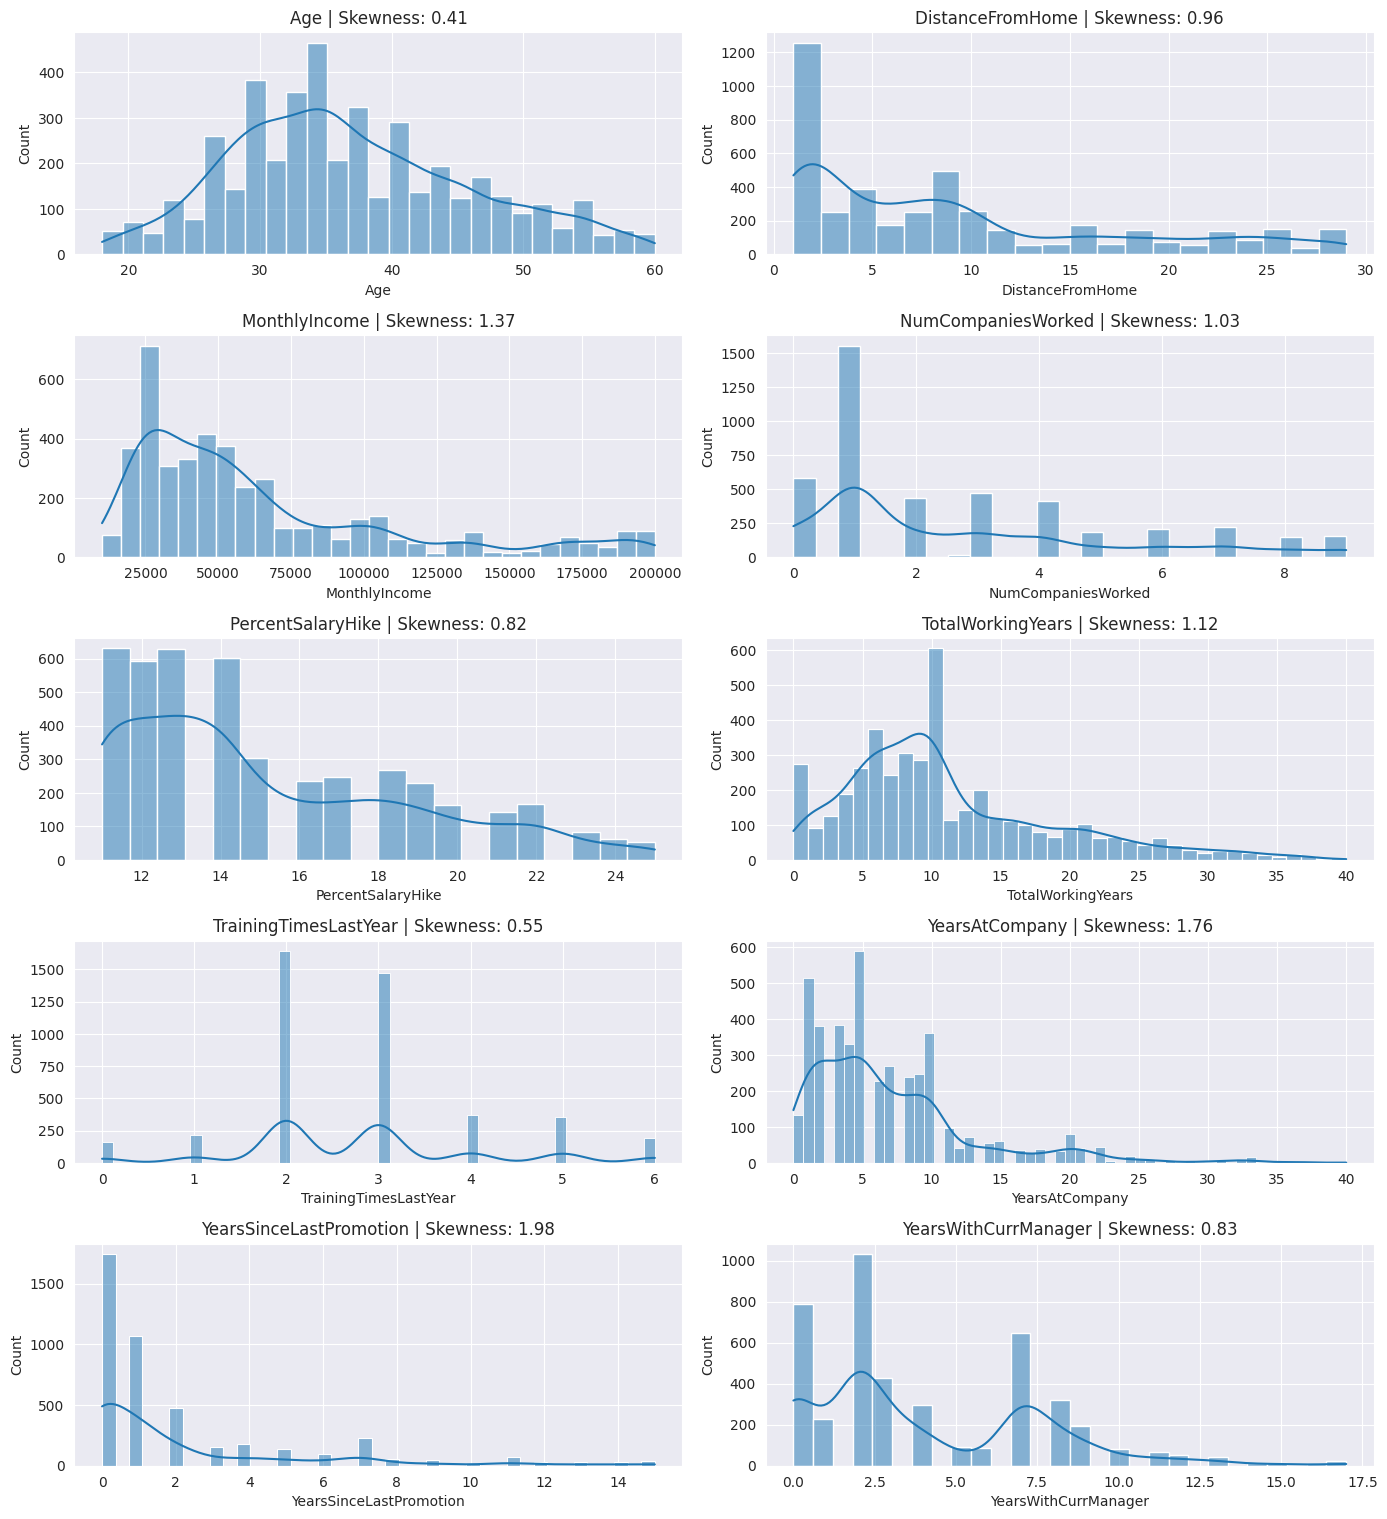

In [ ]:
sns.set_style("darkgrid")

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
numerical_columns = numerical_columns.drop(['EmployeeID', 'EmployeeCount', 'StandardHours', 'Education', 'StockOptionLevel', 'JobLevel'], errors='ignore')

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

In [ ]:
fig = px.box(df, y="MonthlyIncome", points="all")
fig.show()

In [ ]:
fig = px.box(df, y="PercentSalaryHike", points="all")
fig.show()

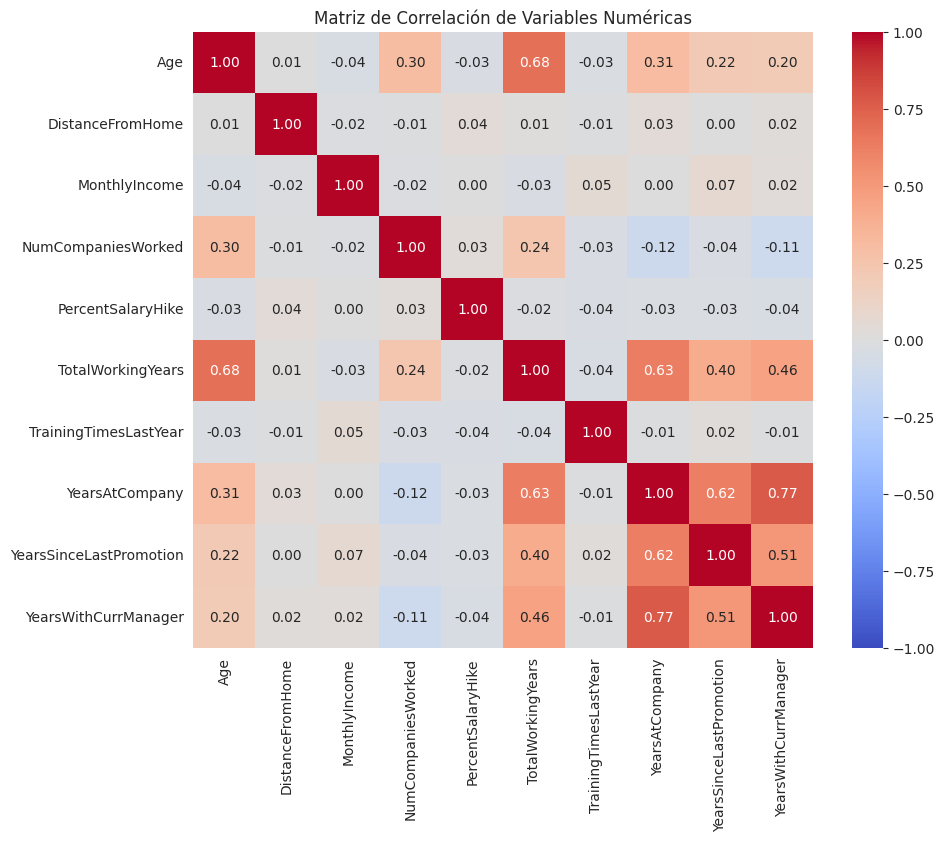

In [ ]:
numeric_df = df.select_dtypes(include=['number']).drop(columns=['EmployeeID', 'EmployeeCount', 'StandardHours', 'Education', 'StockOptionLevel', 'JobLevel'], errors='ignore')

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

One-Hot Encoding a variables categóricas

In [ ]:
df = pd.get_dummies(df, columns=['AgeCategory', 'DistanceCategory', 'BusinessTravel', 'Department', 'EducationCategory', 'EducationField', 'LevelCategory', 'JobRole', 'MaritalStatus', 'IncomeCategory', 'CategoryYearsAtCompany'], drop_first=True)

df.head()


,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,...,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,IncomeCategory_Low Income,IncomeCategory_Mid Income,IncomeCategory_Mid-High Income,IncomeCategory_Mid-Low Income,CategoryYearsAtCompany_B,CategoryYearsAtCompany_C,CategoryYearsAtCompany_D
0,51,No,6,2,1,1,Female,1,131160,1.0,...,False,True,False,False,False,True,False,False,False,False
1,31,Yes,10,1,1,2,Female,1,41890,0.0,...,False,False,True,False,False,False,True,True,False,False
2,32,No,17,4,1,3,Male,4,193280,1.0,...,False,True,False,False,False,False,False,True,False,False
3,38,No,2,5,1,4,Male,3,83210,3.0,...,False,True,False,False,True,False,False,False,True,False
4,32,No,10,1,1,5,Male,1,23420,4.0,...,False,False,True,True,False,False,False,False,True,False


Definición de variables X e Y

In [ ]:
X = df.drop(columns=['Attrition', 'EmployeeID', 'EmployeeCount','Gender', 'Over18', 'StandardHours', 'Age', 'DistanceFromHome', 'Education', 'MonthlyIncome', 'JobLevel', 'TotalWorkingYears', 'YearsAtCompany'])

# Definir la variable objetivo 'y' como la columna 'Attrition' (convertida en binaria)
y = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

División del conjunto de datos en entrenamiento y prueba (70/30)

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Balanceo de conjunto de entrenamiento

In [ ]:
from imblearn.over_sampling import SMOTE

# Crear un objeto SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE solo al conjunto de entrenamiento
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificar la distribución de clases después del balanceo
print("Distribución de clases después del balanceo:")
print(y_train_balanced.value_counts())

Distribución de clases después del balanceo:
Attrition
0    2584
1    2584
Name: count, dtype: int64


Random Forest para ver importancia de variables

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar un modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

# Obtener la importancia de las características
importances = rf_model.feature_importances_

# Mostrar las características más importantes
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))


                                Feature  Importance
5                  YearsWithCurrManager    0.088994
0                    NumCompaniesWorked    0.064975
1                     PercentSalaryHike    0.064946
38                 MaritalStatus_Single    0.063897
3                 TrainingTimesLastYear    0.049426
4               YearsSinceLastPromotion    0.044065
2                      StockOptionLevel    0.030246
12     BusinessTravel_Travel_Frequently    0.029350
40            IncomeCategory_Mid Income    0.023044
28           LevelCategory_Intermediate    0.022627
25                  LevelCategory_Entry    0.022089
39            IncomeCategory_Low Income    0.020861
37                MaritalStatus_Married    0.020034
20         EducationField_Life Sciences    0.019938
6                         AgeCategory_B    0.019589
14  Department_Research and Development    0.019107
34           JobRole_Research Scientist    0.018634
18            EducationCategory_Mastery    0.018633
11      Dist

XGBoost (30% de prueba)

In [ ]:
import xgboost as xgb
xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

xgboost_model.fit(X_train_balanced, y_train_balanced)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:16:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Predecir en el conjunto de prueba
y_pred = xgboost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.9863945578231292
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1115
           1       0.98      0.93      0.96       208

    accuracy                           0.99      1323
   macro avg       0.99      0.96      0.97      1323
weighted avg       0.99      0.99      0.99      1323



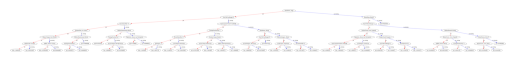

In [ ]:
# Visualizar el árbol número 0
xgb.plot_tree(xgboost_model, num_trees=0)
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada con 5 pliegues
cross_val_scores = cross_val_score(xgboost_model, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation score:", cross_val_scores.mean())


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-validation scores: [1.         1.         1.         0.99886621 1.        ]
Mean cross-validation score: 0.9997732426303856


Regresión logística (30% de prueba) con paquete sickit-learn

In [ ]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo de regresión logística
logistic_model = LogisticRegression(solver='lbfgs', max_iter=500)

# Entrenar el modelo
logistic_model.fit(X_train_balanced, y_train_balanced)

LogisticRegression(max_iter=500)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
# Realizar predicciones con el conjunto de prueba
y_pred = logistic_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7709750566893424
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      1115
           1       0.31      0.38      0.34       208

    accuracy                           0.77      1323
   macro avg       0.60      0.61      0.60      1323
weighted avg       0.79      0.77      0.78      1323



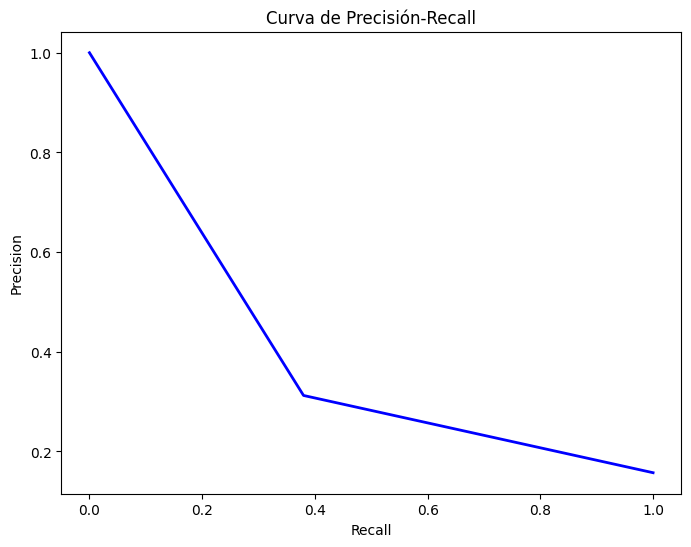

In [ ]:
from sklearn.metrics import precision_recall_curve

# Calcular la curva de precisión-recall
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Graficar la curva de precisión-recall
plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisión-Recall')
plt.show()




---



In [ ]:
from sklearn.model_selection import GridSearchCV

# Crear el clasificador de árbol de decisión
decision_tree = DecisionTreeClassifier(random_state=42)

# Definir los parámetros para el grid search
param_grid = {'max_depth': range(1, 20)}  # Probar diferentes profundidades

# Configurar el GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo
grid_search.fit(X_train_balanced, y_train_balanced)

# Mostrar el mejor valor de max_depth
print("Mejor valor de max_depth:", grid_search.best_params_)
print("Mejor exactitud con ese max_depth:", grid_search.best_score_)


Mejor valor de max_depth: {'max_depth': 19}
Mejor exactitud con ese max_depth: 0.9703996359966371


In [ ]:
# Entrenar el modelo con el mejor max_depth
best_depth = grid_search.best_params_['max_depth']
decision_tree_model = DecisionTreeClassifier(max_depth=10, random_state=42)
decision_tree_model.fit(X_train_balanced, y_train_balanced)

# Evaluar el rendimiento en el conjunto de prueba
y_pred_tree = decision_tree_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))


Accuracy: 0.8639455782312925
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92      1115
           1       0.56      0.66      0.60       208

    accuracy                           0.86      1323
   macro avg       0.75      0.78      0.76      1323
weighted avg       0.87      0.86      0.87      1323



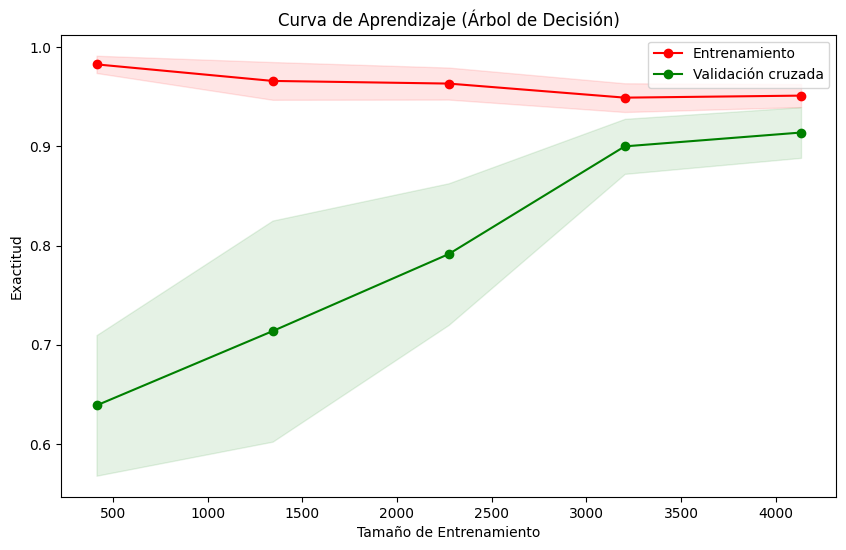

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(decision_tree_model, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy', n_jobs=-1)

# Calcular la media y desviación estándar
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validación cruzada")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Tamaño de Entrenamiento")
plt.ylabel("Exactitud")
plt.title("Curva de Aprendizaje (Árbol de Decisión)")
plt.legend(loc="best")
plt.show()

In [ ]:
!pip install graphviz


In [ ]:
!pip install pydotplus

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Exportar el árbol a formato DOT con los nombres de características corregidos
dot_data = export_graphviz(decision_tree_model,
                           out_file=None,
                           feature_names=X_train_balanced.columns,
                           class_names=['Clase 0', 'Clase 1'],
                           filled=True, rounded=True,
                           special_characters=True)

# Crear una visualización con graphviz
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Guardar el archivo en formato .pdf o .png si lo prefieres
graph.view()


'decision_tree.pdf'